In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

### Assignment:

- Dataset to perform classification: https://www.kaggle.com/datasets/uciml/adult-census-income

- Dataset for regression problem: https://www.kaggle.com/datasets/smid80/weatherww2/data

- More instructions are available in session recordings

In [ ]:
iris = load_iris()
# X=iris.data
X = iris.data[:, :2]  # Select first two features for simplicity
y = iris.target


In [ ]:
X = X[y != 2]
y = y[y != 2]

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [ ]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

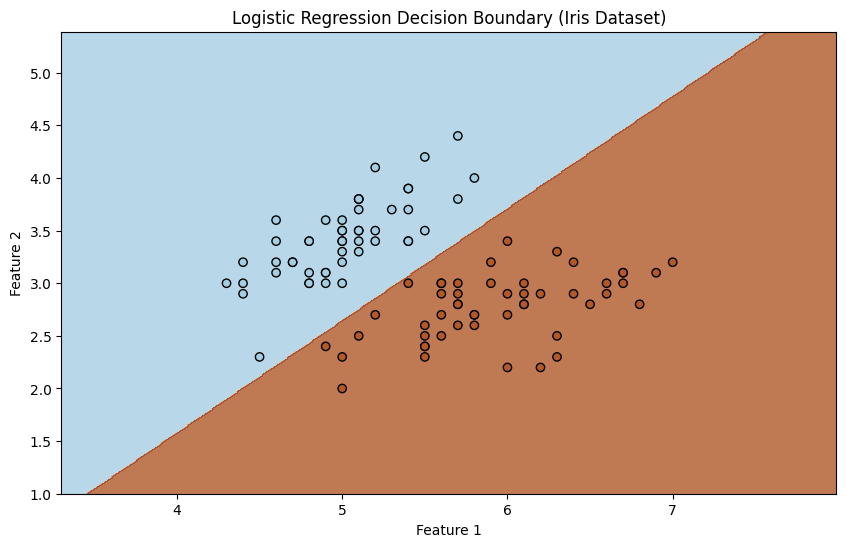

In [ ]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary (Iris Dataset)')
plt.show()

In [ ]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target


In [ ]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df_imbalanced = pd.concat([
    df[df['target'] == 0],  # Keep all 'setosa'
    df[df['target'] == 1],  # Keep all 'versicolor'
    df[df['target'] == 2].sample(10, random_state=42)  # Reduce 'virginica' to 10 samples
])

In [ ]:
df_imbalanced

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
148,6.2,3.4,5.4,2.3,2
126,6.2,2.8,4.8,1.8,2
125,7.2,3.2,6.0,1.8,2
132,6.4,2.8,5.6,2.2,2


In [ ]:
print(df_imbalanced['target'].value_counts())

target
0    50
1    50
2    10
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_imbalanced.iloc[:, :-1], df_imbalanced['target'], test_size=0.3, random_state=42)

In [ ]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         1

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



In [ ]:
# smote: synthetic minority oversampling technique

In [ ]:

from imblearn.over_sampling import SMOTE

In [ ]:
# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Retrain logistic regression model on resampled data
model_smote = LogisticRegression(max_iter=200)
model_smote.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=200)

In [ ]:
# Predict and evaluate again
y_pred_smote = model_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.93      0.97        15
           2       0.50      1.00      0.67         1

    accuracy                           0.97        33
   macro avg       0.83      0.98      0.88        33
weighted avg       0.98      0.97      0.97        33



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target


In [ ]:
y = (y == 2).astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [ ]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
y_score = model.predict_proba(X_test)[:, 1]

In [ ]:
y_score

array([2.13499062e-01, 1.30929932e-05, 9.98126747e-01, 2.23364777e-01,
       2.99671031e-01, 1.18993280e-05, 1.98783453e-02, 8.29378647e-01,
       2.59726525e-01, 3.59373476e-02, 7.44252002e-01, 6.96951321e-06,
       4.42878751e-06, 8.49437327e-06, 9.20153545e-06, 3.19647753e-01,
       9.67155213e-01, 3.37212702e-02, 1.79859216e-01, 9.50627878e-01,
       1.37656200e-05, 5.83098889e-01, 1.74021617e-05, 9.40483932e-01,
       9.79532793e-01, 8.74334924e-01, 9.38054886e-01, 9.75471459e-01,
       1.03472319e-05, 1.38706941e-05, 2.51519038e-06, 7.55362782e-06,
       1.20826755e-01, 1.24241267e-05, 6.81047138e-06, 7.15475159e-01,
       1.86526535e-01, 8.18917664e-06, 6.42783420e-06, 5.39217461e-06,
       7.78669041e-01, 2.25806782e-01, 2.69730749e-01, 5.84483179e-06,
       7.17907238e-06])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

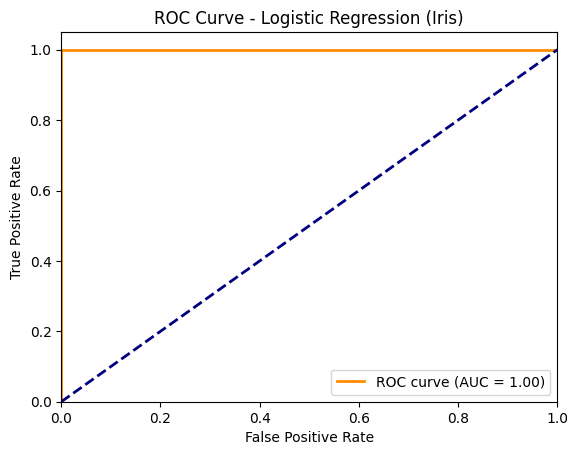

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color="darkorange",
         lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (Iris)")
plt.legend(loc="lower right")
plt.show()